# 6章

## 正則化

### 過学習

ニューラルネットワークは汎化性能を獲得したいので過学習を起こさないようにするのが重要。複雑で表現力の高いモデルを作るときほど、過学習を抑制するテクニックが必要になってくる。

過学習の起きる原因は主に次の2つ。

- パラメータを大量に持ち、表現力の高いモデルであること
- 訓練データが少ないこと

わざと過学習を再現する。MNISTデータセットの訓練データを60000個から300個だけ抜き出して、7層のネットワークを試してみる。

epoch:0, train acc:0.12333333333333334, test acc:0.1118
epoch:1, train acc:0.15, test acc:0.1338
epoch:2, train acc:0.2, test acc:0.1648
epoch:3, train acc:0.25, test acc:0.1979
epoch:4, train acc:0.27666666666666667, test acc:0.2168
epoch:5, train acc:0.3, test acc:0.235
epoch:6, train acc:0.3233333333333333, test acc:0.2557
epoch:7, train acc:0.3466666666666667, test acc:0.2788
epoch:8, train acc:0.39666666666666667, test acc:0.2956
epoch:9, train acc:0.41, test acc:0.3195
epoch:10, train acc:0.43, test acc:0.3313
epoch:11, train acc:0.44333333333333336, test acc:0.3512
epoch:12, train acc:0.4666666666666667, test acc:0.3703
epoch:13, train acc:0.48333333333333334, test acc:0.3828
epoch:14, train acc:0.49666666666666665, test acc:0.3908
epoch:15, train acc:0.48, test acc:0.3948
epoch:16, train acc:0.5033333333333333, test acc:0.4048
epoch:17, train acc:0.52, test acc:0.4142
epoch:18, train acc:0.55, test acc:0.4266
epoch:19, train acc:0.5766666666666667, test acc:0.4389
epoch:20, tra

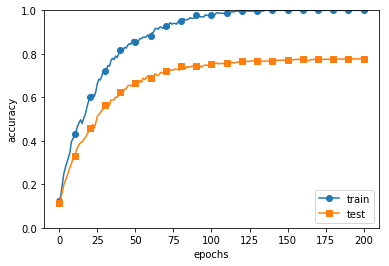

In [2]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
weight_decay_lambda = 0 # weight decayを使用しない場合
# weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データに対しては100%の正答率を誇るがテストデータに対しては75%程度の正答率しかない。
訓練データとテストデータに対する正答率の隔たりは過学習を起こしていることによるもの。

### Weight decay

過学習は重みパラメータが大きな値を取ることによって発生することが多くある。そこで、重みのパラメータを小さくなるように、重みの二乗ノルムを損失関数に加える。損失関数が小さくなるように重みを調整するので重み自体も小さくなる。

epoch:0, train acc:0.07333333333333333, test acc:0.0704
epoch:1, train acc:0.09333333333333334, test acc:0.0785
epoch:2, train acc:0.10666666666666667, test acc:0.0882
epoch:3, train acc:0.12333333333333334, test acc:0.1039
epoch:4, train acc:0.15333333333333332, test acc:0.1169
epoch:5, train acc:0.16666666666666666, test acc:0.1282
epoch:6, train acc:0.17666666666666667, test acc:0.1432
epoch:7, train acc:0.21, test acc:0.1571
epoch:8, train acc:0.24666666666666667, test acc:0.1726
epoch:9, train acc:0.29, test acc:0.1872
epoch:10, train acc:0.30666666666666664, test acc:0.2011
epoch:11, train acc:0.3233333333333333, test acc:0.2181
epoch:12, train acc:0.32666666666666666, test acc:0.2311
epoch:13, train acc:0.38, test acc:0.2475
epoch:14, train acc:0.3933333333333333, test acc:0.2589
epoch:15, train acc:0.4066666666666667, test acc:0.2762
epoch:16, train acc:0.43, test acc:0.2848
epoch:17, train acc:0.4533333333333333, test acc:0.2936
epoch:18, train acc:0.4666666666666667, test acc

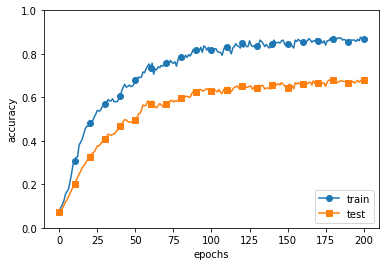

In [3]:
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

隔たりが若干マシになった。訓練データに100%になっていないけどテストデータの正答率もびみょい。やはり訓練データが少ないのは機械学習にとってよろしくない。

### Dropout

過学習を抑制するもう一つの手法としてDropoutというものを試す。

訓練時にデータを流すたびにランダムなニューロンを消去する。
テスト時にはすべてのニューロンを使って消去した割合をかける。

train loss:2.311959541886251
=== epoch:1, train acc:0.08333333333333333, test acc:0.102 ===
train loss:2.299712574084516
train loss:2.308541860978123
train loss:2.325000853528262
=== epoch:2, train acc:0.1, test acc:0.1018 ===
train loss:2.2941956310965184
train loss:2.3044589395408788
train loss:2.3124009632831637
=== epoch:3, train acc:0.1, test acc:0.1024 ===
train loss:2.306426950432053
train loss:2.315692099708714
train loss:2.329366679026084
=== epoch:4, train acc:0.1, test acc:0.1024 ===
train loss:2.3142476121492264
train loss:2.3042038814194905
train loss:2.3077563568739965
=== epoch:5, train acc:0.10666666666666667, test acc:0.1029 ===
train loss:2.3003561799229995
train loss:2.311593615688454
train loss:2.2965386959503804
=== epoch:6, train acc:0.10666666666666667, test acc:0.1047 ===
train loss:2.308512291896197
train loss:2.2908659655690045
train loss:2.312924134115078
=== epoch:7, train acc:0.10666666666666667, test acc:0.105 ===
train loss:2.2985649101172636
train loss:2

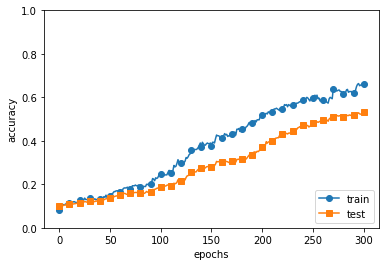

In [4]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

訓練データとテストデータの隔たりが少なくなった。Dropoutを用いれば表現力の高いネットワークでも過学習を抑制できる。